# Project- 5

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

### Load Data

In [2]:
# read data
df=pd.read_csv('../data/2018_gov_features.csv', index_col=0)
df.head()

,dist,ownhome,pid3,gender,age,educ,race,faminc,marstat,newsint,approval_gov,ideo5,voted_gov
392782,19,Other,Democrat,Female,54,4-Year,White,50k - 60k,Single / Never Married,Most of the time,Strongly Approve,Liberal,[Democrat / Candidate 1]
392786,52,Rent,Democrat,Female,28,Some College,White,20k - 30k,Single / Never Married,Most of the time,Strongly Approve,Liberal,[Democrat / Candidate 1]
392800,49,Own,Other,Male,86,Post-Grad,White,120k - 150k,Widowed,Most of the time,Strongly Disapprove,Very Conservative,[Republican / Candidate 2]
392832,36,Own,Republican,Male,80,Some College,White,20k - 30k,Widowed,Most of the time,Strongly Disapprove,Conservative,[Republican / Candidate 2]
392860,36,Own,Independent,Male,83,4-Year,White,Prefer not to say,Married,Most of the time,Strongly Disapprove,Conservative,[Republican / Candidate 2]


In [3]:
df.shape

(3739, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3739 entries, 392782 to 452724
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dist          3739 non-null   int64 
 1   ownhome       3739 non-null   object
 2   pid3          3739 non-null   object
 3   gender        3739 non-null   object
 4   age           3739 non-null   int64 
 5   educ          3739 non-null   object
 6   race          3739 non-null   object
 7   faminc        3739 non-null   object
 8   marstat       3739 non-null   object
 9   newsint       3739 non-null   object
 10  approval_gov  3739 non-null   object
 11  ideo5         3739 non-null   object
 12  voted_gov     3739 non-null   object
dtypes: int64(2), object(11)
memory usage: 409.0+ KB


In [5]:
# baseline accuracy
df['voted_gov'].value_counts(normalize=True)

[Democrat / Candidate 1]       0.611661
[Republican / Candidate 2]     0.368013
I Did Not Vote In This Race    0.009896
Not Sure                       0.006686
Other                          0.003744
Name: voted_gov, dtype: float64

Baseline accuracy is 61.2%. We have unimbalanced data.

In [6]:
# drop other categories, make it a binary classification
df = df[(df.voted_gov != 'I Did Not Vote In This Race') & (df.voted_gov != 'Not Sure') & (df.voted_gov != 'Other')]
df['voted_gov'].value_counts(normalize=True)

[Democrat / Candidate 1]      0.624352
[Republican / Candidate 2]    0.375648
Name: voted_gov, dtype: float64

In [7]:
# map voted_gov column to 0 and 1
df['voted_gov'] = df['voted_gov'].map({'[Democrat / Candidate 1]': 1, '[Republican / Candidate 2]': 0})
df.head()

,dist,ownhome,pid3,gender,age,educ,race,faminc,marstat,newsint,approval_gov,ideo5,voted_gov
392782,19,Other,Democrat,Female,54,4-Year,White,50k - 60k,Single / Never Married,Most of the time,Strongly Approve,Liberal,1
392786,52,Rent,Democrat,Female,28,Some College,White,20k - 30k,Single / Never Married,Most of the time,Strongly Approve,Liberal,1
392800,49,Own,Other,Male,86,Post-Grad,White,120k - 150k,Widowed,Most of the time,Strongly Disapprove,Very Conservative,0
392832,36,Own,Republican,Male,80,Some College,White,20k - 30k,Widowed,Most of the time,Strongly Disapprove,Conservative,0
392860,36,Own,Independent,Male,83,4-Year,White,Prefer not to say,Married,Most of the time,Strongly Disapprove,Conservative,0


In [8]:
df.to_csv('../data/2018_gov_clean1.csv')

## Pre-processing

In [9]:
# set up X and y
X = df.drop(columns =['voted_gov'])
y = df['voted_gov']

In [10]:
X= pd.get_dummies(X, drop_first=True)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, stratify=y)

## Modeling

### 1. RandomForest

In [12]:
rf = RandomForestClassifier()

In [13]:
et = ExtraTreesClassifier()

In [14]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.9239138930286472

In [15]:
cross_val_score(et, X_train, y_train, cv=5).mean()

0.9206418281172379

Random forest and extremely randomized trees performed pretty much the same, random forest is slightly better.

In [16]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [17]:
# gridsearch 
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'max_features': ['sqrt', .5],
    'bootstrap': [True, False],
    'random_state': [42]
}

gs_rf = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=1)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_score_)
gs_rf.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.9264639841033284


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 42}

In [18]:
# gridsearch optimization
print('best score:', gs_rf.best_score_)
print('best parameters:', gs_rf.best_params_)
print('accuracy on train data:', gs_rf.score(X_train, y_train))
print('accuracy on test data:', gs_rf.score(X_val, y_val))

best score: 0.9264639841033284
best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}
accuracy on train data: 1.0
accuracy on test data: 0.9344978165938864


In [19]:
# make predictions 
y_pred = gs_rf.predict(X_val)

# save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

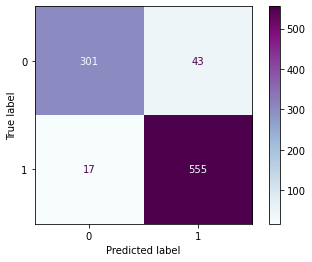

In [20]:
# plot a confusion matrix
plot_confusion_matrix(gs_rf, X_val, y_val, cmap='BuPu', values_format='d');

In [21]:
# sensitivity and accuracy
accu = (tp+tn) / (tp+tn+fp+fn)
recall = tp/(tp+fn)
prec = tp/ (tp+fp)

print('Accuracy:', accu)
print('Recall:', recall)
print('Precision:', prec)

Accuracy: 0.9344978165938864
Recall: 0.9702797202797203
Precision: 0.9280936454849499


It is overfit.

In [22]:
# get feature importances
pd.Series(gs_rf.best_estimator_.feature_importances_, X.columns).sort_values(ascending=False)

approval_gov_Strongly Disapprove                 0.276065
pid3_Republican                                  0.179077
ideo5_Liberal                                    0.062807
approval_gov_Strongly Approve                    0.051030
age                                              0.047006
ideo5_Very Liberal                               0.044914
dist                                             0.037558
ideo5_Very Conservative                          0.036985
pid3_Independent                                 0.023902
approval_gov_Disapprove / Somewhat Disapprove    0.020884
ideo5_Moderate                                   0.015640
race_White                                       0.012629
ownhome_Own                                      0.012001
gender_Male                                      0.010228
ownhome_Rent                                     0.009197
marstat_Single / Never Married                   0.009001
newsint_Most of the time                         0.008666
educ_4-Year   

-  For a classfication random forest model, feature_importances_ is based on the average decrease in Gini impurity over the decision trees. 
- Strongly disapprove category of approval_gov feature has a 45.1% importance in the random forest model. For this variable, individuals were asked "Do you approve of the way each is doing their job". 
- approval_gov_Strongly Approve has a 4.7% importance.
- Age has 6.4% and dist has 5.9%. (dist is Congressional district number in current Congress)

In [23]:
# approval_gov column categories
df['approval_gov'].value_counts()

Strongly Disapprove                 1176
Approve / Somewhat Approve          1109
Strongly Approve                     882
Disapprove / Somewhat Disapprove     365
Never Heard / Not Sure               131
Name: approval_gov, dtype: int64

In [24]:
gs_rf.predict(X_val)[:10]

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [25]:
pred = gs_rf.predict_proba(X_val)
pred[:10]

array([[0.56 , 0.44 ],
       [0.185, 0.815],
       [0.96 , 0.04 ],
       [0.005, 0.995],
       [0.225, 0.775],
       [0.08 , 0.92 ],
       [0.   , 1.   ],
       [0.01 , 0.99 ],
       [0.965, 0.035],
       [0.03 , 0.97 ]])

- The first array, [0, 1], corresponds to the first testing observation. - This first testing observation is predicted to have a 0% chance that  𝑌=0 and a 100% chance that  𝑌=1. The `.predict()` value for this observation is 1. This is because  𝑃(𝑌=1)>𝑃(𝑌=0).
- The fourth array, [0.795, 0.205], corresponds to the fourth testing observation. - This fourth testing observation is predicted to have a 79.5% chance that  𝑌=0 and a 20.5% chance that  𝑌=1. The `.predict()` value for this observation is 0. This is because  𝑃(𝑌=0)>𝑃(𝑌=1).

This model is overfit with 100% accuracy on train and 91% accuracy on test. It could be due to the grid search choosing maximum depth of 'None'. Let's try another model without max_depth of 'None'.

### 2. RandomForest 

In [26]:
rf_2 = RandomForestClassifier()

In [27]:
cross_val_score(rf_2, X_train, y_train, cv=5).mean()

0.9260970359331016

In [28]:
# gridsearch 
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [1, 2, 3, 4, 5, 6],
    'max_features': ['sqrt', .5],
    'bootstrap': [True, False],
    'random_state': [42]
}

gs_rf = GridSearchCV(rf_2, rf_params, cv=5, n_jobs=-1, verbose=1)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_score_)
gs_rf.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.9257333995694651


{'bootstrap': True,
 'max_depth': 6,
 'max_features': 0.5,
 'n_estimators': 100,
 'random_state': 42}

In [29]:
# gridsearch optimization
print('best score:', gs_rf.best_score_)
print('best parameters:', gs_rf.best_params_)
print('accuracy on train data:', gs_rf.score(X_train, y_train))
print('accuracy on test data:', gs_rf.score(X_val, y_val))

best score: 0.9257333995694651
best parameters: {'bootstrap': True, 'max_depth': 6, 'max_features': 0.5, 'n_estimators': 100, 'random_state': 42}
accuracy on train data: 0.9421186749180924
accuracy on test data: 0.9334061135371179


In [30]:
# make predictions 
y_pred = gs_rf.predict(X_val)

# save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

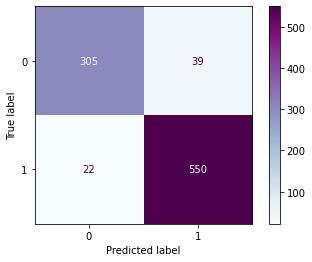

In [31]:
# plot a confusion matrix
plot_confusion_matrix(gs_rf, X_val, y_val, cmap='BuPu', values_format='d');

In [32]:
# sensitivity and accuracy
accu = (tp+tn) / (tp+tn+fp+fn)
recall = tp/(tp+fn)
prec = tp/ (tp+fp)

print('Accuracy:', accu)
print('Recall:', recall)
print('Precision:', prec)

Accuracy: 0.9334061135371179
Recall: 0.9615384615384616
Precision: 0.933786078098472


This model is slightly overfit but much better than the other random forest model we tried. It has an accuracy of 93% on train and 91% on test.

In [33]:
# get feature importances
pd.Series(gs_rf.best_estimator_.feature_importances_, X.columns).sort_values(ascending=False)

approval_gov_Strongly Disapprove                 0.528053
pid3_Republican                                  0.221600
ideo5_Liberal                                    0.044088
approval_gov_Strongly Approve                    0.034273
approval_gov_Disapprove / Somewhat Disapprove    0.029435
ideo5_Very Liberal                               0.024676
pid3_Independent                                 0.020621
age                                              0.016314
ideo5_Very Conservative                          0.015841
dist                                             0.008754
ideo5_Moderate                                   0.006872
newsint_Only now and then                        0.004372
pid3_Other                                       0.004242
race_Black                                       0.003797
race_White                                       0.003558
newsint_Most of the time                         0.003336
ownhome_Own                                      0.002944
ideo5_Not Sure

- Strongly disapprove category of approval_gov feature has a 65% importance in the random forest model. 
- approval_gov_Strongly Approve has a 7% importance.

In [34]:
gs_rf.predict(X_val)[:10]

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [35]:
pred = gs_rf.predict_proba(X_val)
pred[:10]

array([[0.68496479, 0.31503521],
       [0.22947542, 0.77052458],
       [0.9960908 , 0.0039092 ],
       [0.00470917, 0.99529083],
       [0.10559815, 0.89440185],
       [0.08081701, 0.91918299],
       [0.00401949, 0.99598051],
       [0.00536662, 0.99463338],
       [0.99586114, 0.00413886],
       [0.02391078, 0.97608922]])